In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Append pytools path to sys.path so we can do relative imports
sys.path.append("/Users/annydelossantos/Desktop/Credit/pytools")
import snowflake_queries as sq

In [2]:
sys.path.append("/Users/annydelossantos/Desktop/BI_Secure_Reporting")

In [3]:
from reports.utils.snowflake_query_utils import execute_custom_query

In [4]:
#query para sacar los clientes 

Clientes_totales= f''' select  u.global_person_id,p.full_name,p.date_of_birth,p.age,p.gender,p.city,p.city_code,p.state,p.postal_code,p.street,p.building,p.interior,p.neighbourhood,p.municipal,p.barangay,p.mx_street_building_postal_address,p.nationality,p.birth_country,p.country_of_residence,p.civil_status,p.mothers_maiden_name,p.place_of_birth,p.permanent_address_zipcode,p.present_address_zipcode,p.different_mailing_postal_code,p.latest_kyc_id_type,p.latest_kyc_id_number,p.profile_created_at_local, p.profile_updated_at_local, c.first_loan_credit_score, c.first_loan_self_reported_total_monthly_income_local,
c.first_loan_disbursed_at_local, m.is_referred_by_user,m.acquisition_source_for_decisioning,s.current_count_of_disbursed_loans,
s.current_count_of_disbursed_paid_loans,s.current_count_of_disbursed_loans_with_outstanding_balance,s.current_count_of_submitted_loan_applications, s.current_count_of_first_loan_applications, s.current_count_of_repeat_loan_applications,s.count_of_months_from_first_loan_disbursed_to_current_date,s.count_of_days_from_first_loan_disbursed_to_current_date, s.days_from_signup_to_first_loan_disbursed,s.predicted_crm_12month,s.predicted_crm_18month,s.predicted_ltv_12month,s.predicted_ltv_18month, s.predicted_ltv_50month, s.prediction_strategy,s.first_repayment_transaction_at_local, s.last_repayment_transaction_at_local, s.months_from_first_repayment_transaction_at_local_to_current_date,s.days_from_first_repayment_transaction_at_local_to_current_date,
s.months_from_last_repayment_transaction_at_local_to_current_date, s.days_from_last_repayment_transaction_at_local_to_current_date
from (select  l.global_person_id 
from analytics.tala_core.dim_loan l
left join analytics.tala_core.dim_repayment_promise r  on r.global_credit_application_id= l.global_credit_application_id
where l.COUNTRY_DATA_SOURCE = 'mexico' and to_date(LOAN_DISBURSED_AT_LOCAL)>='2023-01-01' 
group by 1) as a
left join (select * from  analytics.tala_core.dim_user where country_data_source= 'mexico' ) u   on a.global_person_id  = u.global_person_id
left join analytics.tala_core.dim_user__profile_attributes p on a.global_person_id= p.global_person_id
left join analytics.tala_core.dim_user__marketing_acquisition_attributes m on a.global_person_id= m.global_person_id
left join analytics.tala_core.fact_user_accumulating_snapshot s on a.global_person_id= s.global_person_id
left join analytics.tala_core.dim_user__cohort_attributes c on  a.global_person_id= c.global_person_id

; ''' 
Clientes_totales=execute_custom_query(Clientes_totales)
Clientes_totales

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://accounts.google.com/o/saml2/idp?idpid=C031uqm95&SAMLRequest=jZJRb9sgFIX%2FisWeY7DT1A2KE2VJ00XruqxxOqlvBIjLisHl4rj99yNOI7UPrSqBhOA7cC7njibPlY720oGyJkdJTFAkDbdCmTJHm2LRu0AReGYE09bIHL1IQJPxCFilazpt%2FIO5lU%2BNBB%2BFiwzQ7iBHjTPUMlBADaskUM%2FpevrrmqYxobWz3nKr0RvJ5woGIJ0PDk8SASrYe%2FC%2Bphi3bRu3%2Fdi6EqeEEEyGOFAH5NuJfw41fcAnmJwd%2BEAEfPXq7bsyxy%2F4zNb2CAH9URSr3ur3ukDR9GR1Zg00lXRr6faKy83t9dEABAc3V8PBMMtiMLbdafYoua3qxoe74rDCOymwtqUK5S7nOaoflfi7lefzTVJuM5%2BUkPWvLrb8jmWwuC%2F%2FXRZyf1kvp3wlfortH46iu1Oe6SHPJUAjl%2BaQog9bJB30yKCXZkUypGEMSHyent2jaB5SVIb5Tnmyyji3jfEQl9aWWnb%2BLD5ElmIl6kmYSuQz0k%2Bap2o4QMfWoN2bbvy1gkf4rea1t27Cdy%2FnK6sVf4kW1lXMf5xGEifdjhK9XYdSWTGlp0I4CRBS0dq2MyeZDy3sXSMRHh9ffd%2FE4%2F8%3D&RelayState=ver%3A1-hint%3A31357955253454-E

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,predicted_ltv_12month,predicted_ltv_18month,predicted_ltv_50month,prediction_strategy,first_repayment_transaction_at_local,last_repayment_transaction_at_local,months_from_first_repayment_transaction_at_local_to_current_date,days_from_first_repayment_transaction_at_local_to_current_date,months_from_last_repayment_transaction_at_local_to_current_date,days_from_last_repayment_transaction_at_local_to_current_date
0,844424940694725,CESAR ANTONIO BRINDIS - ROMAN,1999-02-27,26,m,tuxtla gutierrez,00802003,chp,29049,andador zasafras,...,4.00,14.90,48.1000,CREDIT_12.0,2024-02-14 20:46:07.356507,2024-03-15 21:06:26.782662,15.0,468.0,14.0,438.0
1,844424930276387,BANGLADESH ZAPATA - VAZQUEZ,1981-07-13,43,f,cdmx,01001002,cmx,09890,capri,...,27.08,40.59,72.9145,CREDIT_6.2,2022-08-16 01:03:52.000000,2023-02-17 13:55:25.000000,33.0,1015.0,27.0,830.0
2,844424937099847,ALEXIS DE JESUS CRUZ - RAMIREZ,1995-03-31,30,m,mexico,02199006,mor,62616,av.miguel hidalgo,...,8.19,13.64,31.1420,CREDIT_6.2,2022-08-30 16:43:34.295595,2023-03-31 19:42:58.658476,33.0,1001.0,26.0,788.0
3,844424944245730,OSCAR ANDRES CHAIREZ - RAMOS,1999-11-23,25,m,navojoa,03742009,son,85800,prol gral ignacio pesqueira,...,-3.53,5.86,34.8200,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN
4,844424938590810,ERIKA GUADALUPE HERNANDEZ - BECERRIL,1993-01-12,32,f,morelia,01953009,mic,58342,flor de primavera,...,-0.09,6.53,20.1200,CREDIT_8.0,2023-03-09 11:27:59.905271,2023-03-09 18:36:56.965757,26.0,810.0,26.0,810.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575906,844424945729716,GEOVANNI ZAMORA - DIAZ,1998-04-21,27,m,mexico,01899009,mex,52700,av hidalgo,...,-3.53,5.86,34.8200,CREDIT_14.0,NaT,NaT,NaN,NaN,NaN,NaN
2575907,844424935673645,MARTIN GERSON GARCÍA - MORALES,1972-05-17,53,m,México,01001002,cmx,14080,15 manzana 18,...,2.23,3.12,14.8360,CREDIT_4.0,2021-12-31 11:19:03.000000,2023-05-06 15:35:54.000000,41.0,1243.0,24.0,752.0
2575908,844424945009676,JULIO CESAR HERNANDEZ - GALLEGOS,1973-06-19,51,m,comalcalco,03817003,tab,86670,leandro rovirosa wade,...,10.01,22.11,58.7000,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN
2575909,844424943948606,ISAIAS HERNANDEZ - DE LA CRUZ,1993-07-05,31,m,villahermosa,03814309,tab,86040,margarita maza de juarez,...,17.85,31.52,72.5300,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN


In [5]:
#query para nombrar canales 
Canal= f'''
SELECT 
   b.GLOBAL_PERSON_ID,
    COALESCE(SUM(a.INBOUND), 0) AS INBOUND,
    COALESCE(SUM(a.OUTBOUND), 0) AS OUTBOUND,
    COALESCE(SUM(a.WHATSAPP), 0) AS WHATSAPP,
    COALESCE(SUM(a.TALA_APP), 0) AS TALA_APP,
    COALESCE(SUM(a.INBOUND_PAYMENT), 0) AS INBOUND_PAYMENT,
    COALESCE(SUM(a.OUTBOUND_PAYMENT), 0) AS OUTBOUND_PAYMENT,
    COALESCE(SUM(a.WHATSAPP_PAYMENT), 0) AS WHATSAPP_PAYMENT,
    COALESCE(SUM(a.TALA_APP_PAYMENT), 0) AS TALA_APP_PAYMENT,
     COALESCE(b.selfcure, 0) as Selfcure,
       COALESCE(b.monto_pago, 0) as monto_pago,
         COALESCE(b.selfcure , 0) + 
    COALESCE(SUM(a.INBOUND_PAYMENT), 0) + 
    COALESCE(SUM(a.OUTBOUND_PAYMENT), 0) + 
    COALESCE(SUM(a.WHATSAPP_PAYMENT), 0) + 
    COALESCE(SUM(a.TALA_APP_PAYMENT), 0) AS PAYMENT,
    COALESCE(SUM(a.Promise), 0) AS Promise,
    COALESCE(SUM(a.plan), 0) AS plan,
   COALESCE( COUNT(a.GLOBAL_CREDIT_APPLICATION_ID),0) AS ptp_pp
   
FROM 
(select *, CASE WHEN monto_pago=0 THEN 1 ELSE 0 END AS sin_pago,
        CASE WHEN monto_pago>0 AND "PTP" = 0 THEN 1 ELSE 0 END AS selfcure 
        from (
select f.GLOBAL_PERSON_ID, sum(f.amount_repaid_local) as monto_pago,
 count(r.global_person_id) as ptp
from analytics.tala_core.fact_user_loan_status_daily f
left join analytics.tala_core.dim_repayment_promise r on r.global_person_id=f.global_person_id
where days_past_due>0 and f.COUNTRY_DATA_SOURCE ='mexico'and to_date(f.calendar_date_local)>'2023-01-01'
group by 1)) b 
LEFT JOIN 
(
    SELECT 
        r.GLOBAL_CREDIT_APPLICATION_ID,
        r.global_person_id, 
        m.interaction_channel,
        CASE 
            WHEN m.interaction_channel = 'five9_inbound' THEN 1 
            ELSE 0 
        END AS Inbound,
        CASE
            WHEN m.interaction_channel = 'five9_outbound' THEN 1 
            ELSE 0 
        END AS Outbound,
        CASE
            WHEN m.interaction_channel = 'whatsapp' THEN 1 
            ELSE 0 
        END AS whatsapp,
        CASE
            WHEN m.interaction_channel = 'tala_app' THEN 1 
            ELSE 0 
        END AS tala_app,
        CASE 
            WHEN r.CURRENT_PROMISE_AMOUNT_REPAID > 0 AND m.interaction_channel = 'five9_inbound' THEN 1 
            ELSE 0 
        END AS Inbound_PAYMENT,
        CASE 
            WHEN r.CURRENT_PROMISE_AMOUNT_REPAID > 0 AND m.interaction_channel = 'five9_outbound' THEN 1 
            ELSE 0 
        END AS outbound_PAYMENT,
        CASE 
            WHEN r.CURRENT_PROMISE_AMOUNT_REPAID > 0 AND m.interaction_channel = 'whatsapp' THEN 1 
            ELSE 0 
        END AS whatsapp_PAYMENT,
        CASE 
            WHEN r.CURRENT_PROMISE_AMOUNT_REPAID > 0 AND m.interaction_channel = 'tala_app' THEN 1 
            ELSE 0 
        END AS TALA_APP_PAYMENT,
    
        CASE 
            WHEN r.promise_type = 'promise_to_pay' THEN 1 
            ELSE 0 
        END AS Promise,
        CASE 
            WHEN r.promise_type = 'payment_plan' THEN 1 
            ELSE 0 
        END AS Plan
    FROM 
        analytics.tala_core.dim_repayment_promise r
    LEFT JOIN 
        analytics.tala_core.dim_loan l 
        ON l.global_credit_application_id = r.global_credit_application_id
    LEFT JOIN 
        analytics.tala_core.dim_agent ag 
        ON ag.global_agent_id = r.global_agent_id
    LEFT JOIN 
        analytics.tala_core.fact_recoveries_interactions n 
        ON n.global_interaction_id = r.global_interaction_id
    LEFT JOIN 
        analytics.tala_core.dim_payment_plan_interaction_channel m 
        ON n.GLOBAL_INTERACTION_CHANNEL_ID = m.GLOBAL_INTERACTION_CHANNEL_ID
    WHERE 
        TO_DATE(l.LOAN_DISBURSED_AT_LOCAL) >= '2023-01-01' 
        AND r.country_data_source = 'mexico'
        AND m.interaction_channel IN ('whatsapp', 'tala_app', 'five9_outbound', 'five9_inbound')
) a 
ON b.GLOBAL_PERSON_ID = a.global_person_id
GROUP BY 
    b.GLOBAL_PERSON_ID,
    b.selfcure,
     b.sin_pago,
      b.monto_pago


; ''' 
Canal=execute_custom_query(Canal)
Canal

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://accounts.google.com/o/saml2/idp?idpid=C031uqm95&SAMLRequest=jZJRb9owFIX%2FSuQ9EyehKY1FQAzGmqkwVCiV%2BuYll2DVsYOvQ8q%2FnwlF6h5a7cGSZX%2FH91yfOxy%2FVdI7gkGhVUpCPyAeqFwXQpUpedrMe3fEQ8tVwaVWkJITIBmPhsgrWbNJY%2FfqEQ4NoPXcQwpZd5GSxiimOQpkileAzOZsPVk8sMgPWG201bmW5IPkawVHBGOdw6ukQOHs7a2tGaVt2%2Fpt39empFEQBDRIqKPOyLcr%2F%2BZ6%2BoQPaXBz5h3h8NW7t%2B9CXb7gK1t%2FLhCy%2B81m1Vv9Xm%2BIN7lanWqFTQVmDeYocnh6fLgYQOdg%2BTOJk8HAR6XbneSvkOuqbqx7y3c7uoOCSl0K1242S0n9Kgo4lrdwN01%2BZNX2%2FjiNF6fwV5Q82%2Fiw3Ne7sgwPy%2FlgkeXNts2Jt73mGZ3zzBAbyNQ5ReuOgijuBXEvGmzChEUxuwn920H%2FhXgzl6JQ3HbKq1We57pRFv1S61JC50%2FTc2QRFUU9dksU6TToh82hSmJyGQ3W1TSj%2F2t4SD9q3mdr6b47m620FPnJm2tTcft5GqEfdiei6O06lEHFhZwUhQFEl4qUup0a4NaNsDUNEDq6VP13iEd%2FAQ%3D%3D&RelayState=ver%3A1-hint%3A31

,global_person_id,inbound,outbound,whatsapp,tala_app,inbound_payment,outbound_payment,whatsapp_payment,tala_app_payment,selfcure,monto_pago,payment,promise,plan,ptp_pp
0,844424943206297,0,1,0,1,0,0,0,0,0,0.00,0,2,0,2
1,844424937402165,1,11,0,1,0,1,0,0,0,124074.60,1,13,0,13
2,844424944061629,0,1,0,0,0,1,0,0,0,2672.60,1,1,0,1
3,844424942663151,0,1,0,2,0,0,0,1,0,3006.69,1,3,0,3
4,844424933810232,0,2,0,1,0,0,0,0,0,0.00,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905828,844424935352564,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0
2905829,844424941868851,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0
2905830,844424935245412,0,0,0,0,0,0,0,0,1,2646.60,1,0,0,0
2905831,844424933559161,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0


In [6]:
#unimos base de clientes con pagos por canal
cliente_canal=pd.merge(Clientes_totales, Canal, on='global_person_id',how='left')
cliente_canal

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,inbound_payment,outbound_payment,whatsapp_payment,tala_app_payment,selfcure,monto_pago,payment,promise,plan,ptp_pp
0,844424940694725,CESAR ANTONIO BRINDIS - ROMAN,1999-02-27,26,m,tuxtla gutierrez,00802003,chp,29049,andador zasafras,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,844424930276387,BANGLADESH ZAPATA - VAZQUEZ,1981-07-13,43,f,cdmx,01001002,cmx,09890,capri,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,844424937099847,ALEXIS DE JESUS CRUZ - RAMIREZ,1995-03-31,30,m,mexico,02199006,mor,62616,av.miguel hidalgo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,844424944245730,OSCAR ANDRES CHAIREZ - RAMOS,1999-11-23,25,m,navojoa,03742009,son,85800,prol gral ignacio pesqueira,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,844424938590810,ERIKA GUADALUPE HERNANDEZ - BECERRIL,1993-01-12,32,f,morelia,01953009,mic,58342,flor de primavera,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575906,844424945729716,GEOVANNI ZAMORA - DIAZ,1998-04-21,27,m,mexico,01899009,mex,52700,av hidalgo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575907,844424935673645,MARTIN GERSON GARCÍA - MORALES,1972-05-17,53,m,México,01001002,cmx,14080,15 manzana 18,...,0.0,0.0,0.0,0.0,0.0,32304.0,0.0,1.0,0.0,1.0
2575908,844424945009676,JULIO CESAR HERNANDEZ - GALLEGOS,1973-06-19,51,m,comalcalco,03817003,tab,86670,leandro rovirosa wade,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2575909,844424943948606,ISAIAS HERNANDEZ - DE LA CRUZ,1993-07-05,31,m,villahermosa,03814309,tab,86040,margarita maza de juarez,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#query para llamadas
llamadas= f'''
select global_person_id, count( global_unique) as llamada,
count(case when IS_RIGHT_PERSON_CONTACTED =true then 1 else 0 end ) as RPC
from analytics.tala_core.fact_call_log 
where country_data_source='mexico' and  to_date( convert_timezone('America/Mexico_City', CALLED_AT) )>'2023-01-01'
group by 1


; ''' 
llamadas=execute_custom_query(llamadas)
llamadas

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://accounts.google.com/o/saml2/idp?idpid=C031uqm95&SAMLRequest=jZJfb9owFMW%2FSuQ9EyeBDGIRUApiIFpKC2zS3rzYSa06durrkHaffg5%2FpPah1R4iRfY5%2Ft17zx1PXyvpHbkBoVWKQj9AHle5ZkKVKTrsF70R8sBSxajUiqfojQOaTsZAK1mTrLFP6pG%2FNBys5x5SQLqLFDVGEU1BAFG04kBsTnbZ3S2J%2FIBQAG6sw6GLhYFwrCdra4Jx27Z%2B2%2Fe1KXEUBAEOEuxUneQbeoeov2bURluda3m1vLqePkGEOBh0CKdwhO3FeCPUeQRfUf6cRUCW%2B%2F22t73f7ZGXXbubaQVNxc2Om6PI%2BeHx9lwAuAo2P5I4GQ59ULotJH3mua7qxrq3fPeHC86w1KVwE1rNU1Q%2FC8Z3h%2FpIb2i4qObFSK7%2FjjZytyhYslxn3%2FPjYrAcROuHXw8l6Bx5P695Rl2eK4CGr1SXonVHQRT3grgXDfdhQqKEhLEf9we%2FkTd3KQpF7cl5LZXmuW6UBb%2FUupT8VJ%2FGXQQRFqyeuk%2BwdBb0w%2BalSmJ0Xg1yYprJ%2FzU8xu89l93auHGv5lstRf7mLbSpqP08jdAPTyeC9YqTlPCKCpkxZjiAS0VK3c4Mp9atsDUNR3hypn5c4sk%2F&RelayState=ver%3A1-hint%3A3135795525

,global_person_id,llamada,rpc
0,844424930796021,759,759
1,844424930932766,349,349
2,844424931831918,286,286
3,844424930961369,292,292
4,844424930581417,363,363
...,...,...,...
2410235,844424944878630,1,1
2410236,844424944882470,1,1
2410237,844424943941618,1,1
2410238,844424944957257,1,1


In [8]:
#unimos clientes con compra por canal con las llamadas 
cliente_canal=pd.merge(cliente_canal, llamadas, on='global_person_id',how='left')
cliente_canal

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,whatsapp_payment,tala_app_payment,selfcure,monto_pago,payment,promise,plan,ptp_pp,llamada,rpc
0,844424940694725,CESAR ANTONIO BRINDIS - ROMAN,1999-02-27,26,m,tuxtla gutierrez,00802003,chp,29049,andador zasafras,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,401.0,401.0
1,844424930276387,BANGLADESH ZAPATA - VAZQUEZ,1981-07-13,43,f,cdmx,01001002,cmx,09890,capri,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,109.0
2,844424937099847,ALEXIS DE JESUS CRUZ - RAMIREZ,1995-03-31,30,m,mexico,02199006,mor,62616,av.miguel hidalgo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175.0,175.0
3,844424944245730,OSCAR ANDRES CHAIREZ - RAMOS,1999-11-23,25,m,navojoa,03742009,son,85800,prol gral ignacio pesqueira,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,208.0
4,844424938590810,ERIKA GUADALUPE HERNANDEZ - BECERRIL,1993-01-12,32,f,morelia,01953009,mic,58342,flor de primavera,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575906,844424945729716,GEOVANNI ZAMORA - DIAZ,1998-04-21,27,m,mexico,01899009,mex,52700,av hidalgo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575907,844424935673645,MARTIN GERSON GARCÍA - MORALES,1972-05-17,53,m,México,01001002,cmx,14080,15 manzana 18,...,0.0,0.0,0.0,32304.0,0.0,1.0,0.0,1.0,118.0,118.0
2575908,844424945009676,JULIO CESAR HERNANDEZ - GALLEGOS,1973-06-19,51,m,comalcalco,03817003,tab,86670,leandro rovirosa wade,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,73.0,73.0
2575909,844424943948606,ISAIAS HERNANDEZ - DE LA CRUZ,1993-07-05,31,m,villahermosa,03814309,tab,86040,margarita maza de juarez,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,281.0


In [9]:
#quitamos duplicadod de la base final 
df= cliente_canal.drop_duplicates(subset=['global_person_id'], keep='last')
df

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,whatsapp_payment,tala_app_payment,selfcure,monto_pago,payment,promise,plan,ptp_pp,llamada,rpc
0,844424940694725,CESAR ANTONIO BRINDIS - ROMAN,1999-02-27,26,m,tuxtla gutierrez,00802003,chp,29049,andador zasafras,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,401.0,401.0
1,844424930276387,BANGLADESH ZAPATA - VAZQUEZ,1981-07-13,43,f,cdmx,01001002,cmx,09890,capri,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,109.0
2,844424937099847,ALEXIS DE JESUS CRUZ - RAMIREZ,1995-03-31,30,m,mexico,02199006,mor,62616,av.miguel hidalgo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175.0,175.0
3,844424944245730,OSCAR ANDRES CHAIREZ - RAMOS,1999-11-23,25,m,navojoa,03742009,son,85800,prol gral ignacio pesqueira,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,208.0
4,844424938590810,ERIKA GUADALUPE HERNANDEZ - BECERRIL,1993-01-12,32,f,morelia,01953009,mic,58342,flor de primavera,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575906,844424945729716,GEOVANNI ZAMORA - DIAZ,1998-04-21,27,m,mexico,01899009,mex,52700,av hidalgo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575907,844424935673645,MARTIN GERSON GARCÍA - MORALES,1972-05-17,53,m,México,01001002,cmx,14080,15 manzana 18,...,0.0,0.0,0.0,32304.0,0.0,1.0,0.0,1.0,118.0,118.0
2575908,844424945009676,JULIO CESAR HERNANDEZ - GALLEGOS,1973-06-19,51,m,comalcalco,03817003,tab,86670,leandro rovirosa wade,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,73.0,73.0
2575909,844424943948606,ISAIAS HERNANDEZ - DE LA CRUZ,1993-07-05,31,m,villahermosa,03814309,tab,86040,margarita maza de juarez,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,281.0


In [10]:
#sacamos los principales datos estadisticos de la base

print(df.describe())

       global_person_id           age  first_loan_credit_score  \
count      2.575911e+06  2.575911e+06             2.575760e+06   
mean       8.444249e+14  3.622811e+01             8.459540e-01   
std        3.392304e+06  1.116530e+01             5.032343e-02   
min        8.444249e+14  1.000000e+00             3.451000e-01   
25%        8.444249e+14  2.800000e+01             8.092060e-01   
50%        8.444249e+14  3.400000e+01             8.455000e-01   
75%        8.444249e+14  4.300000e+01             8.816630e-01   
max        8.444249e+14  1.250000e+02             9.914000e-01   

       first_loan_self_reported_total_monthly_income_local  \
count                                       2.392088e+06     
mean                                        3.494112e+07     
std                                         4.773836e+10     
min                                         0.000000e+00     
25%                                         7.200000e+03     
50%                              

In [11]:
#Creamos los intervalos para las variables que evaluamos en el modelo 
df['llamada'] = df['llamada'].fillna(0)
df['rpc'] = df['rpc'].fillna(0)
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['1-17','18-24', '25-34', '35-44', '45-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['income_segment'] = pd.cut(df['first_loan_self_reported_total_monthly_income_local'], bins=[0, 2000, 5000, 10000, 20000], labels=['Low', 'Medium', 'High', 'Very High'])
df['created_year'] = df['profile_created_at_local'].dt.year
df['updated_year'] = df['profile_updated_at_local'].dt.year
df['First_loan_year']=df['first_loan_disbursed_at_local'].dt.year
df['first_repayment_year']=df['first_repayment_transaction_at_local'].dt.year
df['last_repayment_year']=df['last_repayment_transaction_at_local'].dt.year
num_bins = 7 
labels = ['0-0.45', '0.45-0.6', '0.6-0.75', '0.75-0.8', '0.8-0.87', '0.87-0.95', '0.95-1.00']
df['credit_score_range'] = pd.qcut(df['first_loan_credit_score'], q=num_bins, labels=labels)

bins = [0, 5, 10, 15, 20, 30, 50,60,200]  
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-60','60-200']  
df['disbursed_loans_range'] = pd.cut(df['current_count_of_disbursed_loans'], bins=bins, labels=labels, right=True)
bins = [0, 5, 10, 15, 20, 30, 50,60,200]  
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-60','60-200']  
df['disbursed_paid_loans_range'] = pd.cut(df['current_count_of_disbursed_paid_loans'], bins=bins, labels=labels, right=True)


In [12]:
#Creamos los intervalos para las variables que evaluamos en el modelo 
df['payment_rate'] = df['current_count_of_disbursed_paid_loans'] / df['current_count_of_disbursed_loans']

df['payment_rate'] = np.where(df['current_count_of_disbursed_loans'] > 0,
                               df['current_count_of_disbursed_paid_loans'] / df['current_count_of_disbursed_loans'],
                               0) 



bins = [-0.001, 0.2, 0.4, 0.6, 0.8, 0.85, 0.90, 0.95, 1.00]  
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-0.85', '0.85-0.90', '0.90-0.95', '0.95-1.00']  

df['payment_rate_range'] = pd.cut(df['payment_rate'], bins=bins, labels=labels, right=True)



In [13]:
#Creamos los intervalos para las variables que evaluamos en el modelo
bins = [0, 5, 10, 15, 20, 30, 50,60,200] 
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-60','60-200']  
df['submitted_loan_applications_range'] = pd.cut(df['current_count_of_submitted_loan_applications'], bins=bins, labels=labels, right=True)
bins = [0, 5, 10, 15, 20, 30, 50,60,200] 
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-60','60-200']  
df['repeat_loan_applications_range'] = pd.cut(df['current_count_of_repeat_loan_applications'], bins=bins, labels=labels, right=True)
bins = [0, 5, 10, 15, 20, 40, 60,70,100] 
labels = ['1-5', '5-10', '10-15', '15-20', '20-40', '40-60', '60-70','70-100']  
df['months_from_first_loan_disbursed_range'] = pd.cut(df['count_of_months_from_first_loan_disbursed_to_current_date'], bins=bins, labels=labels, right=True)
bins = [0, 15, 30, 100, 300, 500, 700,1000,2500]  
labels = ['1-15', '15-30', '30-100', '100-300', '300-500', '500-700', '700-1000','1000-2500'] 
df['days_from_first_loan_disbursed_range'] = pd.cut(df['count_of_days_from_first_loan_disbursed_to_current_date'], bins=bins, labels=labels, right=True)
bins = [0, 5, 10, 15, 20, 30, 50,80]  # Límites de los rangos
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50','50+' ]  # Etiquetas para los rangos
df['months_from_last_repayment_range'] = pd.cut(df['months_from_last_repayment_transaction_at_local_to_current_date'], bins=bins, labels=labels, right=True)
bins = [0, 15, 30, 60, 90, 100, 250,500,800,1000,2000]  # Límites de los rangos
labels = ['1-15','15-30','30-60','60-90','90-100', '100-250', '250-500', '500-800', '800-1000', '1000-2000' ]  # Etiquetas para los rangos
df['days_from_last_repayment_range'] = pd.cut(df['days_from_last_repayment_transaction_at_local_to_current_date'], bins=bins, labels=labels, right=True)

In [14]:
# Deja 1 si 'ptp_pp' es 1 osea tiene algun pago o plan de pagos (gestion de operación)
df['Marcar'] = np.where(
    (df['ptp_pp'] == 1) |  
    ((df['current_count_of_disbursed_paid_loans'] == 0) |  # Condición 1
     (df['days_from_last_repayment_range'].isnull() & (df['current_count_of_disbursed_paid_loans'] == 0))),  # Condición 2
    1,  
    0   
)

In [15]:
# Crear la columna 'main_channel_pay' tomando el canal con mayor número de pagos
df['main_channel'] = df[['Marcar','selfcure']].idxmax(axis=1)

# Reemplazar 'main_channel_pay' con "pago selfcure" si todas las columnas de pagos son 0 o NaN
df['main_channel'] = df.apply(lambda row: 'sin_definir' if (row[['Marcar','selfcure']].fillna(0).sum() == 0) else row['main_channel'], axis=1)

In [16]:
# Filtrar el DataFrame para eliminar las filas donde 'main_channel_pay' sea "pago selfcure"
df3 = df[df['main_channel'] != 'sin_definir']

# Visualizar el DataFrame filtrado
df3

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,payment_rate,payment_rate_range,submitted_loan_applications_range,repeat_loan_applications_range,months_from_first_loan_disbursed_range,days_from_first_loan_disbursed_range,months_from_last_repayment_range,days_from_last_repayment_range,Marcar,main_channel
3,844424944245730,OSCAR ANDRES CHAIREZ - RAMOS,1999-11-23,25,m,navojoa,03742009,son,85800,prol gral ignacio pesqueira,...,0.0000,0-0.2,1-5,NaN,1-5,100-300,NaN,NaN,1,Marcar
5,844424941243465,FCO JAVIER MEDINA - LEY,1955-03-28,70,m,etchojoa,03726009,son,85287,luis g. rascon,...,0.0000,0-0.2,1-5,NaN,10-15,300-500,NaN,NaN,1,Marcar
6,844424936782666,JOSE ALBERTO GUZMAN - VALENCIA,1986-03-20,39,m,"san lorenzo cacaotepec, oaxaca",02999007,oax,68263,primer privada jesus alvarez,...,0.9375,0.90-0.95,15-20,10-15,20-40,1000-2500,20-30,500-800,0,selfcure
7,844424942007089,DULCE VANESSA GALLEGOS - MORENO,1995-02-02,30,f,torreon,00573009,coa,27087,twente,...,0.0000,0-0.2,1-5,NaN,5-10,300-500,NaN,NaN,1,Marcar
8,844424940008142,CARLOS PONCE - CHIRINOS,1967-02-22,58,m,pueblo viejo,04234007,ver,92035,peru,...,0.0000,0-0.2,1-5,NaN,15-20,500-700,NaN,NaN,1,Marcar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575906,844424945729716,GEOVANNI ZAMORA - DIAZ,1998-04-21,27,m,mexico,01899009,mex,52700,av hidalgo,...,0.0000,0-0.2,1-5,NaN,NaN,1-15,NaN,NaN,1,Marcar
2575907,844424935673645,MARTIN GERSON GARCÍA - MORALES,1972-05-17,53,m,México,01001002,cmx,14080,15 manzana 18,...,0.9375,0.90-0.95,15-20,10-15,40-60,1000-2500,20-30,500-800,1,Marcar
2575908,844424945009676,JULIO CESAR HERNANDEZ - GALLEGOS,1973-06-19,51,m,comalcalco,03817003,tab,86670,leandro rovirosa wade,...,0.0000,0-0.2,1-5,NaN,1-5,30-100,NaN,NaN,1,Marcar
2575909,844424943948606,ISAIAS HERNANDEZ - DE LA CRUZ,1993-07-05,31,m,villahermosa,03814309,tab,86040,margarita maza de juarez,...,0.0000,0-0.2,1-5,NaN,1-5,100-300,NaN,NaN,1,Marcar


In [17]:


# Definir la lista de variables que vamos a utilizar selecionadas previamente por el análisis de distribución con garficas
columns_to_extract = [
    'global_person_id', 
    'state',
    'municipal',
    'gender' ,
    'inbound', 
    'outbound', 
    'whatsapp', 
    'tala_app', 
    'inbound_payment', 
    'outbound_payment', 
    'whatsapp_payment', 
    'tala_app_payment', 
    'selfcure',                                                              
    'monto_pago',
    'payment', 
    'promise', 
    'plan', 
    'Marcar', 
    'age_group', 
    'main_channel',                                                                                                                
    'income_segment', 
    'created_year', 
    'updated_year', 
    'First_loan_year', 
    'credit_score_range', 
    'disbursed_loans_range', 
    'disbursed_paid_loans_range', 
    'payment_rate', 
    'payment_rate_range', 
    'submitted_loan_applications_range', 
    'repeat_loan_applications_range', 
    'months_from_first_loan_disbursed_range', 
    'days_from_first_loan_disbursed_range', 
    'first_repayment_year', 
    'last_repayment_year', 
    'months_from_last_repayment_range', 
    'days_from_last_repayment_range',
    'latest_kyc_id_type',                                                       
'latest_kyc_id_number',                                                      
'profile_created_at_local',                                          
'profile_updated_at_local',                                           
'first_loan_credit_score',                                                    
'first_loan_self_reported_total_monthly_income_local',                       
'first_loan_disbursed_at_local',                                       
'is_referred_by_user',                                                          
'acquisition_source_for_decisioning',                                         
'current_count_of_disbursed_loans',                                             
'current_count_of_disbursed_paid_loans',                                       
'current_count_of_disbursed_loans_with_outstanding_balance',                   
'current_count_of_submitted_loan_applications',                                
'current_count_of_first_loan_applications',                                    
'current_count_of_repeat_loan_applications',                                   
'count_of_months_from_first_loan_disbursed_to_current_date',                   
'count_of_days_from_first_loan_disbursed_to_current_date',                     
'days_from_signup_to_first_loan_disbursed',                                   
'predicted_crm_12month',                                                     
'predicted_crm_18month',                                                   
'predicted_ltv_12month',                                                     
'predicted_ltv_18month',                                                      
'predicted_ltv_50month',                                                     
'prediction_strategy',                                                        
'first_repayment_transaction_at_local',                                
'last_repayment_transaction_at_local',                                 
'months_from_first_repayment_transaction_at_local_to_current_date',           
'days_from_first_repayment_transaction_at_local_to_current_date',             
'months_from_last_repayment_transaction_at_local_to_current_date',            
'days_from_last_repayment_transaction_at_local_to_current_date' ,
'llamada',                                                              
'rpc'
]

# Extraer las columnas en un nuevo DataFrame
df2 = df3[columns_to_extract]

df2


,global_person_id,state,municipal,gender,inbound,outbound,whatsapp,tala_app,inbound_payment,outbound_payment,...,predicted_ltv_50month,prediction_strategy,first_repayment_transaction_at_local,last_repayment_transaction_at_local,months_from_first_repayment_transaction_at_local_to_current_date,days_from_first_repayment_transaction_at_local_to_current_date,months_from_last_repayment_transaction_at_local_to_current_date,days_from_last_repayment_transaction_at_local_to_current_date,llamada,rpc
3,844424944245730,son,navojoa,m,0.0,0.0,0.0,0.0,0.0,0.0,...,34.8200,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN,208.0,208.0
5,844424941243465,son,etchojoa,m,0.0,0.0,0.0,0.0,0.0,0.0,...,80.9700,CREDIT_12.0,NaT,NaT,NaN,NaN,NaN,NaN,180.0,180.0
6,844424936782666,oax,santiago etla,m,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0985,CREDIT_6.2,2022-06-21 14:38:47.348222,2023-04-06 17:03:30.559846,35.0,1071.0,25.0,782.0,143.0,143.0
7,844424942007089,coa,torreon,f,0.0,0.0,0.0,0.0,0.0,0.0,...,42.2600,CREDIT_12.0,NaT,NaT,NaN,NaN,NaN,NaN,157.0,157.0
8,844424940008142,ver,pueblo viejo ver,m,0.0,0.0,0.0,0.0,0.0,0.0,...,54.4900,CREDIT_11.0,NaT,NaT,NaN,NaN,NaN,NaN,380.0,380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575906,844424945729716,mex,caphuluac,m,NaN,NaN,NaN,NaN,NaN,NaN,...,34.8200,CREDIT_14.0,NaT,NaT,NaN,NaN,NaN,NaN,0.0,0.0
2575907,844424935673645,cmx,tlalpan,m,1.0,0.0,0.0,0.0,0.0,0.0,...,14.8360,CREDIT_4.0,2021-12-31 11:19:03.000000,2023-05-06 15:35:54.000000,41.0,1243.0,24.0,752.0,118.0,118.0
2575908,844424945009676,tab,comalcalco,m,0.0,1.0,0.0,0.0,0.0,0.0,...,58.7000,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN,73.0,73.0
2575909,844424943948606,tab,centro,m,0.0,0.0,0.0,0.0,0.0,0.0,...,72.5300,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN,281.0,281.0


In [18]:
# Crear un diccionario con la clasificación de los estados por regiones
region_mapping = {
    'bcn': 'Norte', 'bc': 'Norte', 'bcs': 'Norte', 'chh': 'Norte', 'chih': 'Norte', 
    'coa': 'Norte', 'dur': 'Norte', 'dgo': 'Norte', 'nle': 'Norte', 'nl': 'Norte', 
    'son': 'Norte', 'tam': 'Norte', 'tamp': 'Norte', 'zac': 'Norte', 'sin': 'Norte',
    'agu': 'Centro-Norte', 'gua': 'Centro-Norte', 'gto': 'Centro-Norte', 
    'que': 'Centro-Norte', 'qro': 'Centro-Norte', 'slp': 'Centro-Norte',
    'cmx': 'Centro', 'cdmx': 'Centro', 'mex': 'Centro', 'hid': 'Centro', 'hgo': 'Centro', 
    'mor': 'Centro', 'pue': 'Centro', 'tla': 'Centro', 'tlax': 'Centro',
    'col': 'Occidente', 'jal': 'Occidente', 'mic': 'Occidente', 'mich': 'Occidente', 
    'nay': 'Occidente',
    'gro': 'Sur', 'oax': 'Sur',
    'cam': 'Sureste', 'chp': 'Sureste', 'chis': 'Sureste', 'roo': 'Sureste', 
    'qroo': 'Sureste', 'tab': 'Sureste', 'ver': 'Sureste', 'yuc': 'Sureste'
}

# Agregar una nueva columna 'region' al DataFrame basada en el mapeo de estados
df2['region'] = df2['state'].map(region_mapping)




/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_1742/2062133579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['region'] = df2['state'].map(region_mapping)


In [ ]:
#Norte: Baja California (bcn), Baja California Sur (bcs), Chihuahua (chh, chih), Coahuila (coa), Durango (dur, dgo), Nuevo León (nle, nl), Sonora (son), Tamaulipas (tam, tamp), Zacatecas (zac), Sinaloa (sin).

#Centro-Norte: Aguascalientes (agu), Guanajuato (gua, gto), Querétaro (que, qro), San Luis Potosí (slp).

#Centro: Ciudad de México (cmx, cdmx), Estado de México (mex), Hidalgo (hid, hgo), Morelos (mor), Puebla #(pue), Tlaxcala (tla, tlax).

#Occidente: Colima (col), Jalisco (jal), Michoacán (mic, mich), Nayarit (nay).

#Sur: Guerrero (gro), Oaxaca (oax).

#Sureste: Campeche (cam), Chiapas (chp, chis), Quintana Roo (roo, qroo), Tabasco (tab), Veracruz (ver), Yucatán (yuc).

In [19]:
#limpiamos de registros nulos 

df2 = df2[df2['credit_score_range'].notnull()]
df2= df2[df2['state'].notnull()]
df2= df2[df2['age_group'].notnull()]
df2= df2[df2['income_segment'].notnull()]
df2= df2[df2['payment'].notnull()]
df2= df2[df2['disbursed_paid_loans_range'].notnull()]
df2= df2[df2['days_from_last_repayment_range'].notnull()]
df2= df2[df2['first_repayment_year'].notnull()]
df2= df2[df2['months_from_first_loan_disbursed_range'].notnull()]

if 'repeat_loan_applications_range' in df2.columns:
    df2['repeat_loan_applications_range'].fillna('1-5', inplace=True)


In [20]:
#limpiamos de registros nulos 
df2= df2[df2['predicted_crm_12month'].notnull()]
df2= df2[df2['predicted_ltv_12month'].notnull()]
df2= df2[df2['region'].notnull()]
df2= df2[df2['latest_kyc_id_type'].notnull()]

In [21]:
#limpiamos de registros nulos 
df2.isnull().sum()

global_person_id                                                   0
state                                                              0
municipal                                                          0
gender                                                             0
inbound                                                            0
                                                                  ..
months_from_last_repayment_transaction_at_local_to_current_date    0
days_from_last_repayment_transaction_at_local_to_current_date      0
llamada                                                            0
rpc                                                                0
region                                                             0
Length: 70, dtype: int64

In [22]:
# Calcular las proporciones de cada clase en 'main_channel'
proporciones = df2['main_channel'].value_counts(normalize=True)

# Mostrar las proporciones
print(proporciones)

selfcure    0.511051
Marcar      0.488949
Name: main_channel, dtype: float64


In [23]:
#selecionamos variables 
features = [
'state',       
'municipal',                                                              
'gender',                                                               
'main_channel',                                                        
'income_segment',                                                       
'created_year',                                                           
'updated_year',                                                      
'First_loan_year',                                                   
'credit_score_range',                                                   
'disbursed_loans_range',                                                 
'disbursed_paid_loans_range',                                           
'payment_rate',                                                       
'payment_rate_range',                                                  
'submitted_loan_applications_range',                                   
'repeat_loan_applications_range',                                        
'months_from_first_loan_disbursed_range',                               
'days_from_first_loan_disbursed_range',                                
'first_repayment_year',                                                  
'last_repayment_year',                                                 
'months_from_last_repayment_range',                               
'days_from_last_repayment_range',                                      
'latest_kyc_id_type',                                                
'latest_kyc_id_number',                                                
'profile_created_at_local',                                              
'profile_updated_at_local',                                             
'first_loan_credit_score',                                           
'first_loan_self_reported_total_monthly_income_local',                   
'first_loan_disbursed_at_local',                                      
'is_referred_by_user',                                               
'acquisition_source_for_decisioning',                                
'current_count_of_disbursed_loans',                                        
'current_count_of_disbursed_paid_loans',                                   
'current_count_of_disbursed_loans_with_outstanding_balance',               
'current_count_of_submitted_loan_applications',                       
'current_count_of_first_loan_applications',                             
'current_count_of_repeat_loan_applications',                             
'count_of_months_from_first_loan_disbursed_to_current_date',              
'count_of_days_from_first_loan_disbursed_to_current_date',                 
'days_from_signup_to_first_loan_disbursed',                               
'predicted_crm_12month' ,                                                 
'predicted_crm_18month',                                               
'predicted_ltv_12month',                                               
'predicted_ltv_18month',                                               
'predicted_ltv_50month',                                            
'prediction_strategy',                                                     
'first_repayment_transaction_at_local',                                    
'last_repayment_transaction_at_local',                                     
'months_from_first_repayment_transaction_at_local_to_current_date',        
'days_from_first_repayment_transaction_at_local_to_current_date' ,         
'months_from_last_repayment_transaction_at_local_to_current_date',        
'days_from_last_repayment_transaction_at_local_to_current_date',
'rpc',
'llamada'
]

In [24]:
#Calculamos la precisión por variable para elegir aquellas que tienen mayor influencia en el modelo.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import gc

# Definir los segmentos
segment_size = 5 
segments = [features[i:i + segment_size] for i in range(0, len(features), segment_size)]


results_list = []


for segment in segments:
    print(f"Evaluando segmento: {segment}")
    for column in segment:
        try:
           
            sample_df = df2.sample(frac=0.1, random_state=42)  
            X = pd.get_dummies(sample_df[[column]], drop_first=True) 
            y = np.where(sample_df['main_channel'] == 'selfcure', 0, 1)  
            
           
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            
            
            dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=20, 
                                              random_state=42, class_weight='balanced')  
            dt_model.fit(X_train, y_train)  
            accuracy = dt_model.score(X_test, y_test) 

           
            y_pred = dt_model.predict(X_test)
            class_report = classification_report(y_test, y_pred, output_dict=True)
            
            
            results_list.append({
                "Variable": column,
                "Precisión (0)": class_report['0']['precision'],
                "Precisión (1)": class_report['1']['precision'],
                "F1-Score (0)": class_report['0']['f1-score'],
                "F1-Score (1)": class_report['1']['f1-score'],
                "Recall (0)": class_report['0']['recall'],
                "Recall (1)": class_report['1']['recall'],
                "Precisión total": accuracy
            })
            
        except Exception as e:
            print(f"Error con la variable {column}: {e}")
        
        finally:
        
            del X
            gc.collect()


results_df = pd.DataFrame(results_list)


results_df_sorted = results_df.sort_values(by="Precisión total", ascending=False)

# Mostrar los resultados en formato tabla
print(results_df_sorted)


Evaluando segmento: ['state', 'municipal', 'gender', 'main_channel', 'income_segment']
Evaluando segmento: ['created_year', 'updated_year', 'First_loan_year', 'credit_score_range', 'disbursed_loans_range']
Evaluando segmento: ['disbursed_paid_loans_range', 'payment_rate', 'payment_rate_range', 'submitted_loan_applications_range', 'repeat_loan_applications_range']
Evaluando segmento: ['months_from_first_loan_disbursed_range', 'days_from_first_loan_disbursed_range', 'first_repayment_year', 'last_repayment_year', 'months_from_last_repayment_range']
Evaluando segmento: ['days_from_last_repayment_range', 'latest_kyc_id_type', 'latest_kyc_id_number', 'profile_created_at_local', 'profile_updated_at_local']
Error con la variable latest_kyc_id_type: at least one array or dtype is required


/Users/annydelossantos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annydelossantos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annydelossantos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Evaluando segmento: ['first_loan_credit_score', 'first_loan_self_reported_total_monthly_income_local', 'first_loan_disbursed_at_local', 'is_referred_by_user', 'acquisition_source_for_decisioning']
Evaluando segmento: ['current_count_of_disbursed_loans', 'current_count_of_disbursed_paid_loans', 'current_count_of_disbursed_loans_with_outstanding_balance', 'current_count_of_submitted_loan_applications', 'current_count_of_first_loan_applications']
Evaluando segmento: ['current_count_of_repeat_loan_applications', 'count_of_months_from_first_loan_disbursed_to_current_date', 'count_of_days_from_first_loan_disbursed_to_current_date', 'days_from_signup_to_first_loan_disbursed', 'predicted_crm_12month']
Evaluando segmento: ['predicted_crm_18month', 'predicted_ltv_12month', 'predicted_ltv_18month', 'predicted_ltv_50month', 'prediction_strategy']
Evaluando segmento: ['first_repayment_transaction_at_local', 'last_repayment_transaction_at_local', 'months_from_first_repayment_transaction_at_local_to_

In [25]:
#cambiar formato de la tabla 
results_df_sorted2=results_df_sorted[['Variable', 'Precisión total']]
results_df_sorted2

,Variable,Precisión total
3,main_channel,1.000000
11,payment_rate,0.566179
12,payment_rate_range,0.566179
51,llamada,0.565260
50,rpc,0.565260
23,profile_updated_at_local,0.557134
49,days_from_last_repayment_transaction_at_local_...,0.555720
48,months_from_last_repayment_transaction_at_loca...,0.555438
45,last_repayment_transaction_at_local,0.555155
20,days_from_last_repayment_range,0.553459


In [26]:
# Renombrar columnas
results_df_sorted = results_df_sorted.rename(columns={
    'Variable': 'Variable',
    'Precisión (0)': 'Precision_0',
    'Precisión (1)': 'Precision_1',
    'F1-Score (0)': 'F1_Score_0',
    'F1-Score (1)': 'F1_Score_1',
    'Recall (0)': 'Recall_0',
    'Recall (1)': 'Recall_1',
    'Precisión total': 'Total_Precision'
})



In [27]:
# Filtrar el DataFrame para excluir 'main_channel'
results_df_sorted_f = results_df_sorted[results_df_sorted['Variable'] != 'main_channel']

# Mostrar el DataFrame actualizado
print(results_df_sorted_f)

                                             Variable  Precision_0  \
11                                       payment_rate     0.564077   
12                                 payment_rate_range     0.564077   
51                                            llamada     0.563738   
50                                                rpc     0.563738   
23                           profile_updated_at_local     0.551207   
49  days_from_last_repayment_transaction_at_local_...     0.557602   
48  months_from_last_repayment_transaction_at_loca...     0.558981   
45                last_repayment_transaction_at_local     0.557607   
20                     days_from_last_repayment_range     0.554177   
32       current_count_of_submitted_loan_applications     0.552250   
44               first_repayment_transaction_at_local     0.566183   
47  days_from_first_repayment_transaction_at_local...     0.565701   
34          current_count_of_repeat_loan_applications     0.554284   
29                  

In [28]:
#Elegimos las variables más relevantes para el modelo
def select_variables(df2, recall_threshold=0.4, f1_threshold=0.4):
    selected_variables = []

    
    for index, row in df2.iterrows():
      
        recall_0 = row['Recall_0']
        recall_1 = row['Recall_1']
        f1_score_0 = row['F1_Score_0']
        f1_score_1 = row['F1_Score_1']
        
    
        if ('_range' not in row['Variable'] and
            recall_0 >= recall_threshold and recall_1 >= recall_threshold and
            f1_score_0 >= f1_threshold and f1_score_1 >= f1_threshold):
            selected_variables.append(row['Variable'])
    
    return selected_variables


selected_variables = select_variables(results_df_sorted_f)


print("Variables seleccionadas para el modelo:", selected_variables)



Variables seleccionadas para el modelo: ['payment_rate', 'llamada', 'rpc', 'profile_updated_at_local', 'days_from_last_repayment_transaction_at_local_to_current_date', 'months_from_last_repayment_transaction_at_local_to_current_date', 'last_repayment_transaction_at_local', 'current_count_of_submitted_loan_applications', 'first_repayment_transaction_at_local', 'days_from_first_repayment_transaction_at_local_to_current_date', 'current_count_of_repeat_loan_applications', 'current_count_of_disbursed_loans', 'months_from_first_repayment_transaction_at_local_to_current_date', 'count_of_days_from_first_loan_disbursed_to_current_date', 'count_of_months_from_first_loan_disbursed_to_current_date', 'first_loan_disbursed_at_local', 'current_count_of_disbursed_paid_loans', 'first_repayment_year', 'First_loan_year', 'prediction_strategy', 'created_year', 'first_loan_credit_score', 'predicted_crm_12month', 'predicted_ltv_12month', 'predicted_ltv_50month', 'gender', 'days_from_signup_to_first_loan_dis

In [29]:
selected_variables= ['global_person_id','payment_rate', 'current_count_of_repeat_loan_applications', 'current_count_of_disbursed_loans', 'current_count_of_disbursed_paid_loans', 'days_from_last_repayment_transaction_at_local_to_current_date', 'prediction_strategy', 'first_repayment_year', 'last_repayment_transaction_at_local', 'count_of_months_from_first_loan_disbursed_to_current_date', 'months_from_last_repayment_transaction_at_local_to_current_date', 'days_from_first_repayment_transaction_at_local_to_current_date', 'profile_created_at_local', 'first_repayment_transaction_at_local', 'months_from_first_repayment_transaction_at_local_to_current_date', 'first_loan_disbursed_at_local', 'count_of_days_from_first_loan_disbursed_to_current_date', 'profile_updated_at_local', 'predicted_ltv_12month', 'rpc','llamada', 'days_from_signup_to_first_loan_disbursed', 'income_segment']

In [ ]:
#Precisión: Mide cuántos de los usuarios identificados como "que pagan" realmente lo hacen. Seleccionamos variables con alta precisión para evitar falsos positivos.

#Recall: Mide cuántos de los usuarios que realmente pagan son identificados. Seleccionamos variables con buen recall para no pasar por alto a quienes debemos contactar.

#F1-Score: Combina precisión y recall en una sola métrica. Usamos esta métrica para balancear ambas, especialmente cuando hay un desbalance entre las clases.

#Exclusión de "range": Las variables con "range" suelen ser menos predictivas y más complejas, por lo que las excluimos para simplificar el modelo.

#Estas métricas nos ayudan a seleccionar las variables que mejor predicen el comportamiento de pago y balancean las decisiones del modelo, haciendo que sea más efectivo y fácil de interpretar.####

In [30]:
# preparamos las variables para correr el modelo 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



X = df2[selected_variables].copy() 
y = np.where(df2['main_channel'] == 'selfcure', 1, 0)


global_person_id = X['global_person_id'].reset_index(drop=True)  
X = X.drop(columns=['global_person_id'])  


date_columns = X.select_dtypes(include=['datetime64']).columns
for col in date_columns:
    X[col] = (X[col] - X[col].min()).dt.days  # Convertir a días desde la fecha mínima


categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ], remainder='passthrough'
)


X_preprocessed = preprocessor.fit_transform(X)


smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_preprocessed, y)

# Agregar 'global_person_id' a los datos sobremuestreados
# Repetimos los valores de 'global_person_id' para alinearlos con los datos sobremuestreados
global_person_id_smote = np.tile(global_person_id.values, int(np.ceil(len(X_smote) / len(global_person_id))))[:len(X_smote)]


X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X_smote, y_smote, global_person_id_smote, test_size=0.3, random_state=42
)

# Reconstruir X_train y X_test incluyendo 'global_person_id'
X_train_with_id = np.column_stack((id_train, X_train))
X_test_with_id = np.column_stack((id_test, X_test))



In [31]:
# Modelo de clasificación
gb_params = {
    'learning_rate': [0.05, 0.1], 
    'n_estimators': [50, 100],  
    'max_depth': [3, 5]  
}


gb_model = GradientBoostingClassifier(random_state=42)


gb_grid_search = GridSearchCV(gb_model, gb_params, scoring='accuracy', cv=3, n_jobs=-1)  


gb_grid_search.fit(X_train, y_train)


best_gb_model = gb_grid_search.best_estimator_


rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

voting_clf = VotingClassifier(
    estimators=[('gb', best_gb_model), ('rf', rf_model)],
    voting='soft'
)


voting_clf.fit(X_train, y_train)

# Evaluación del modelo ensamblado
y_pred = voting_clf.predict(X_test)
print("Matriz de Confusión - Modelo Ensamblado:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación - Modelo Ensamblado:")
print(classification_report(y_test, y_pred))
print("\nPrecisión del modelo ensamblado:", accuracy_score(y_test, y_pred))


Matriz de Confusión - Modelo Ensamblado:
[[39076 33213]
 [20802 51541]]

Reporte de clasificación - Modelo Ensamblado:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59     72289
           1       0.61      0.71      0.66     72343

    accuracy                           0.63    144632
   macro avg       0.63      0.63      0.62    144632
weighted avg       0.63      0.63      0.62    144632


Precisión del modelo ensamblado: 0.6265349300293158


In [56]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Asumiendo que tienes df2 y selected_variables definido:
X = df2[selected_variables].copy()
y = np.where(df2['main_channel'] == 'selfcure', 1, 0)

# Guardamos global_person_id antes de eliminarla
global_person_id = X['global_person_id'].reset_index(drop=True)
X = X.drop(columns=['global_person_id'])

# Convertir columnas fecha a número de días desde la mínima fecha
date_columns = X.select_dtypes(include=['datetime64']).columns
for col in date_columns:
    X[col] = (X[col] - X[col].min()).dt.days

# Columnas categóricas y numéricas
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Preprocesador: OneHot para categóricas, passthrough para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # columnas numéricas quedan sin tocar
)

# Transformamos X
X_preprocessed = preprocessor.fit_transform(X)

# Obtener nombres de variables reales después del preprocesamiento
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_columns)

# El orden es: primero columnas codificadas + columnas numéricas
feature_names = list(ohe_feature_names) + numerical_columns

# Aplicamos SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_preprocessed, y)

# Repetimos global_person_id para que coincida con X_smote
global_person_id_smote = np.tile(global_person_id.values, int(np.ceil(len(X_smote) / len(global_person_id))))[:len(X_smote)]

# Separar train y test
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X_smote, y_smote, global_person_id_smote, test_size=0.3, random_state=42
)

In [58]:
# Modelo: GridSearch para GradientBoosting
gb_params = {
    'learning_rate': [0.05, 0.1], 
    'n_estimators': [50, 100],  
    'max_depth': [3, 5]
}

gb_model = GradientBoostingClassifier(random_state=42)

gb_grid_search = GridSearchCV(gb_model, gb_params, scoring='accuracy', cv=3, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

# RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Ensemble VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('gb', best_gb_model), ('rf', rf_model)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

# Evaluación
y_pred = voting_clf.predict(X_test)
print("Matriz de Confusión - Modelo Ensamblado:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación - Modelo Ensamblado:")
print(classification_report(y_test, y_pred))
print("\nPrecisión del modelo ensamblado:", accuracy_score(y_test, y_pred))

Matriz de Confusión - Modelo Ensamblado:
[[39076 33213]
 [20802 51541]]

Reporte de clasificación - Modelo Ensamblado:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59     72289
           1       0.61      0.71      0.66     72343

    accuracy                           0.63    144632
   macro avg       0.63      0.63      0.62    144632
weighted avg       0.63      0.63      0.62    144632


Precisión del modelo ensamblado: 0.6265349300293158


In [59]:


# Importancia de variables del mejor modelo GB con nombres reales
importancia_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': best_gb_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de variables (nombres reales):")
print(importancia_df.head(20))




Importancia de variables (nombres reales):
                                             Variable  Importancia
15                                       payment_rate     0.220817
33                                            llamada     0.150782
32                                                rpc     0.144536
30                           profile_updated_at_local     0.118985
14                           income_segment_Very High     0.065670
19  days_from_last_repayment_transaction_at_local_...     0.055990
28                      first_loan_disbursed_at_local     0.045651
29  count_of_days_from_first_loan_disbursed_to_cur...     0.034406
21                last_repayment_transaction_at_local     0.033183
25                           profile_created_at_local     0.025487
31                              predicted_ltv_12month     0.017305
16          current_count_of_repeat_loan_applications     0.015077
18              current_count_of_disbursed_paid_loans     0.013335
11                

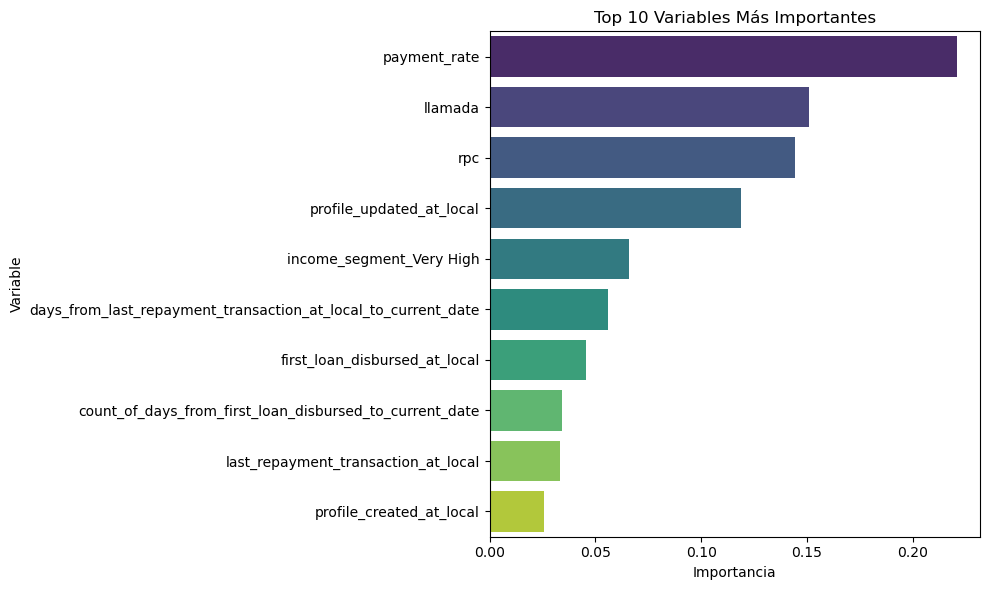

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de tener el top 10
top_10 = importancia_df.sort_values(by='Importancia', ascending=False).head(10)

# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10,
    y='Variable',
    x='Importancia',
    palette='viridis'
)
plt.title('Top 10 Variables Más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [ ]:
# Nombres de variables (si X es un DataFrame, usa sus nombres; si no, crea genéricos)
if isinstance(X, pd.DataFrame):
    feature_names = X.columns
else:
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]

In [36]:


# Nombres de variables (si X es un DataFrame, usa sus nombres; si no, crea genéricos)
if isinstance(X, pd.DataFrame):
    feature_names = X.columns
else:
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# DataFrame de importancias
importancia_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia media': result.importances_mean,
    'Desviación estándar': result.importances_std
}).sort_values(by='Importancia media', ascending=False)

print("\nImportancia de variables:")
print(importancia_df)

Traceback (most recent call last):
  File "/Users/annydelossantos/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 287, in main
    registry[rtype][name] -= 1
KeyError: '/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/joblib_memmapping_folder_1742_35863e083fd446d2a9e7c176cbd6908d_5322ae9ae12242adad058d0857439dbb/1742-140450808488640-ad3b789948b64a8480c1dee295cdb557.pkl'
Traceback (most recent call last):
  File "/Users/annydelossantos/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 287, in main
    registry[rtype][name] -= 1
KeyError: '/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/joblib_memmapping_folder_1742_35863e083fd446d2a9e7c176cbd6908d_5322ae9ae12242adad058d0857439dbb/1742-140450808488640-c6698c92dafa4fcda0e21ab577864b5a.pkl'
Traceback (most recent call last):
  File "/Users/annydelossantos/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/backend/resource_tracker.py", l

KeyboardInterrupt: 

In [ ]:
y_test.mean()

In [ ]:
#

In [ ]:
# Supongamos que tienes un nuevo conjunto de datos en 'X'
X_new = df2[selected_variables].copy()
global_person_id_new = X_new['global_person_id'].reset_index(drop=True)
X_new = X_new.drop(columns=['global_person_id'])

# Convertir columnas de fechas a características numéricas
for col in date_columns:
    X_new[col] = (X_new[col] - X_new[col].min()).dt.days

# Aplicar el mismo preprocesador a los datos nuevos
X_new_preprocessed = preprocessor.transform(X_new)

# Realizar las predicciones
y_pred_proba = voting_clf.predict_proba(X_new_preprocessed)

# Convertir las probabilidades en un DataFrame
probabilities_df = pd.DataFrame(y_pred_proba, columns=voting_clf.classes_)



In [ ]:
df2

In [ ]:
df_lift = pd.DataFrame({'y_real': y, 'yp': y_pred_proba[:, 1]})
df_lift

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que esté ordenado
df_lift = df_lift.sort_values(by='yp', ascending=False).reset_index(drop=True)

# Crear deciles
df_lift['decile'] = pd.qcut(df_lift.index, 10, labels=False)

# Agrupar por decil
gain_chart = df_lift.groupby('decile')['y_real'].agg(['count', 'sum']).rename(columns={'sum': 'positivos'})
gain_chart['cumulative_resp'] = gain_chart['positivos'].cumsum()
gain_chart['gain'] = gain_chart['cumulative_resp'] / gain_chart['positivos'].sum()
gain_chart['lift'] = gain_chart['gain'] / ((gain_chart.index + 1) / 10)

# --------- GRÁFICA DE LIFT CON ETIQUETAS ----------
plt.figure(figsize=(8, 5))
x_vals = (gain_chart.index + 1) * 10
y_vals = gain_chart['lift']
plt.plot(x_vals, y_vals, marker='o', color='teal')
for x, y in zip(x_vals, y_vals):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center', fontsize=8)
plt.title('Gráfica de Lift del modelo ensamblado')
plt.xlabel('Porcentaje de la muestra (Deciles)')
plt.ylabel('Lift')
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- GRÁFICA DE GANANCIA CON ETIQUETAS ----------
plt.figure(figsize=(8, 5))
gain_vals = gain_chart['gain'] * 100
plt.plot(x_vals, gain_vals, marker='o', color='darkorange')
plt.plot([0, 100], [0, 100], linestyle='--', color='gray', label='Modelo aleatorio')
for x, y in zip(x_vals, gain_vals):
    plt.text(x, y + 1, f'{y:.1f}%', ha='center', fontsize=8)
plt.title('Curva de Ganancia Acumulada del modelo ensamblado')
plt.xlabel('Porcentaje de la muestra (Deciles)')
plt.ylabel('Ganancia acumulada (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_lift.sort_values(by='yp', ascending=False).head(n=10)

In [ ]:
df_lift['quintil'] = pd.qcut(df_lift['yp'], q=5, labels=['q1', 'q2', 'q3', 'q4', 'q5'])

In [ ]:
total_por_quintil = df_lift.groupby('quintil')['y_real'].count()
total_por_quintil

In [ ]:
# Calcular el número de positivos por quintil
positivos_por_quintil = df_lift.groupby('quintil')['y_real'].sum()
positivos_por_quintil

In [ ]:
# Calcular la proporción de positivos por quintil
proporcion_positivos = positivos_por_quintil / df_lift['y_real'].sum() * 100
proporcion_positivos

In [ ]:
# Calcular el lift por quintil (porcentaje en el quintil comparado con el promedio global)
promedio_global = df_lift['y_real'].mean() * 100
lift = (positivos_por_quintil / total_por_quintil) / (promedio_global / 100)

print("\nLift por Quintil:")
print(lift)


In [ ]:
# Crear un DataFrame resumen para la tabla de lift
tabla_lift = pd.DataFrame({
    'Total': total_por_quintil,
    'Positivos': positivos_por_quintil,
    '% Positivos': (positivos_por_quintil / total_por_quintil * 100),
    'Lift': lift
})

print("\nTabla de Lift:")
print(tabla_lift)

In [ ]:


deciles = pd.qcut(df_lift['yp'], q=10, labels=[f'd{i}' for i in range(1, 11)])
df_lift['decil'] = deciles

# Contar positivos y calcular porcentaje por decil
lift_table = df_lift.groupby('decil').agg(
    Total=('y_real', 'count'),
    Positivos=('y_real', 'sum')
).sort_index(ascending=False)  # Ordenar por decil descendente para análisis
lift_table['% Positivos'] = lift_table['Positivos'] / lift_table['Total'] * 100

# Calcular el Lift
avg_positive_rate = df_lift['y_real'].mean() * 100  # Promedio de positivos en el dataset
lift_table['Lift'] = lift_table['% Positivos'] / avg_positive_rate

# Mostrar la tabla
print(lift_table)


In [ ]:
X_test_df = pd.concat([df_lift, df2.reset_index(drop=True)], axis=1)
X_test_df

In [ ]:
X_test_df.dtypes

In [ ]:
X_test_df= X_test_df.loc[:, ~X_test_df.columns.duplicated()]
X_test_df

In [ ]:
X_test_df = X_test_df.set_index('global_person_id')
print(X_test_df.index)

In [ ]:
# Obtén la lista de GLOBAL_PERSON_ID desde tu DataFrame
user_ids = X_test_df.index.get_level_values('global_person_id').tolist()  # Asumiendo que el índice es GLOBAL_PERSON_ID
user_ids

In [ ]:
trimestres = [
    ('2023-01-01', '2023-03-31'),
    ('2023-04-01', '2023-06-30'),
    ('2023-07-01', '2023-09-30'),
    ('2023-10-01', '2023-12-31'),
    ('2024-01-01', '2024-03-31'),
    ('2024-04-01', '2024-06-30'),
    ('2024-07-01', '2024-09-30'),
    ('2024-10-01', '2024-12-31'),
    ('2025-01-01', '2025-03-31'),  # Ajusta este período según la fecha actual
    # Agrega más trimestres si es necesario para 2025
]

In [ ]:
def query_por_trimestre(start_date, end_date):
    query = f'''
   WITH pagos_ops AS (
    SELECT 
        global_person_id,
        TO_DATE(last_promise_repayment_at_local) AS REPAYMENT_DATE
    FROM 
        analytics.tala_core.dim_repayment_promise 
    WHERE 
        COUNTRY_DATA_SOURCE = 'mexico' 
        AND TO_DATE(last_promise_repayment_at_local) BETWEEN '{start_date}' AND '{end_date}'  -- Filtro de fechas
        AND promise_type = 'promise_to_pay'  
        AND last_promise_repayment_at_local IS NOT NULL  

    UNION ALL

    SELECT
        op.user_id AS global_person_id,
        TO_DATE(t.local_date_time) AS REPAYMENT_DATE
    FROM (
        SELECT
            *,
            LEAD(CONVERT_TIMEZONE('America/Mexico_City', pp.CREATED_AT)) OVER (
                PARTITION BY pp.user_id, pp.PRODUCT_ID 
                ORDER BY CONVERT_TIMEZONE('America/Mexico_City', pp.CREATED_AT)
            ) AS NEXT_PP_CREATED_AT
        FROM 
            FIVETRAN.MX_PROD_REPAYMENTS_REPAYMENTS.PAYMENT_PLANS pp
        WHERE 
            pp.plan_type = 'PLAN'
    ) op
    LEFT JOIN analytics.tala_core.dim_repayment_promise b 
        ON REGEXP_REPLACE(b.global_interaction_id, '[^0-9]', '') = op.INTERACTION_ID  -- Eliminamos caracteres no numéricos
    LEFT JOIN business_db.credit.transaction_basic_mx t 
        ON TO_VARCHAR(t.corr_loan_application_id) = op.PRODUCT_ID
    WHERE 
        t.LOCAL_DATE_TIME >= CONVERT_TIMEZONE('America/Mexico_City', op.CREATED_AT)
        AND (t.LOCAL_DATE_TIME < IFNULL(CONVERT_TIMEZONE('America/Mexico_City', op.NEXT_PP_CREATED_AT), CONVERT_TIMEZONE('America/Mexico_City', op.EXPIRATION_DATE)))
        AND t.type IN (2, 9)
        AND TO_DATE(t.local_date_time) BETWEEN '{start_date}' AND '{end_date}'  -- Filtro de fechas
),
llamadas AS (
    SELECT 
        global_person_id, 
        TO_DATE(CONVERT_TIMEZONE('America/Mexico_City', CALLED_AT)) AS fecha_llamada
    FROM 
        analytics.tala_core.fact_call_log 
    WHERE 
        country_data_source = 'mexico' 
        AND TO_DATE(CONVERT_TIMEZONE('America/Mexico_City', CALLED_AT)) BETWEEN '{start_date}' AND '{end_date}'
),
pagos AS (
    SELECT 
        f.GLOBAL_PERSON_ID, 
        TO_DATE(f.calendar_date_local) AS fecha_pago
    FROM 
        analytics.tala_core.fact_user_loan_status_daily f
    WHERE 
        f.COUNTRY_DATA_SOURCE = 'mexico'
        AND TO_DATE(f.calendar_date_local) BETWEEN '{start_date}' AND '{end_date}'
        AND f.days_past_due > 0 
        AND f.amount_repaid_local > 0
),
llamadas_previas AS (
    SELECT 
        p.GLOBAL_PERSON_ID,
        p.fecha_pago,
        COUNT(l.fecha_llamada) AS total_llamadas_previas  -- Total de llamadas previas al pago
    FROM 
        pagos p
    LEFT JOIN 
        llamadas l 
        ON p.GLOBAL_PERSON_ID = l.global_person_id
        AND l.fecha_llamada BETWEEN DATEADD(day, -10, p.fecha_pago) AND p.fecha_pago
    GROUP BY 
        p.GLOBAL_PERSON_ID, 
        p.fecha_pago
)
SELECT 
    p.GLOBAL_PERSON_ID,
    COUNT(p.fecha_pago) AS total_pagos,  -- Total de pagos
    COUNT(CASE WHEN po.REPAYMENT_DATE IS NOT NULL THEN 1 ELSE NULL END) AS pagos_con_llamada,  -- Pagos en OPS (con llamada)
    COUNT(CASE WHEN po.REPAYMENT_DATE IS NULL THEN 1 ELSE NULL END) AS pagos_sin_llamada,  -- Pagos no en OPS (sin llamada)
    SUM(lp.total_llamadas_previas) AS total_llamadas_previas  -- Suma de llamadas previas
FROM 
    pagos p
LEFT JOIN 
    pagos_ops po 
    ON p.GLOBAL_PERSON_ID = po.global_person_id
    AND p.fecha_pago = po.REPAYMENT_DATE
LEFT JOIN 
    llamadas_previas lp 
    ON p.GLOBAL_PERSON_ID = lp.GLOBAL_PERSON_ID 
    AND p.fecha_pago = lp.fecha_pago
GROUP BY 
    p.GLOBAL_PERSON_ID;
    '''
    return execute_custom_query(query)



In [ ]:


# Lista para almacenar los resultados de cada trimestre
resultados_trimestres = []

# Ejecutar el query para cada trimestre
for start_date, end_date in trimestres:
    print(f"Procesando trimestre: {start_date} - {end_date}")
    df_trimestre = query_por_trimestre(start_date, end_date)
    resultados_trimestres.append(df_trimestre)

# Combinar todos los DataFrames en uno solo
df_final = pd.concat(resultados_trimestres)



In [ ]:
print(df_final.head())

In [ ]:
# Agrupar por global_person_id y sumar las métricas
df_final = df_final.groupby('global_person_id').agg({
    'pagos_sin_llamada': 'sum',
    ' total_llamadas_previas': 'sum',
     ' pagos_con_llamada': 'sum',
}).reset_index()

# Mostrar el resultado final
print(df_final.head())

In [ ]:
df1 = pd.merge(X_test_df, df_final, on="global_person_id", how="left")

df1.dtypes

In [ ]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
print(df1.dtypes)

In [ ]:
df3 = pd.merge( pagos_f, df1, on="global_person_id", how="inner")

df3

In [ ]:
columns_to_fill = [
    'pago_ops_mes',
    'selfcure_mes',
    'monto_semana',
    'pago_ops_semana',
    'selfcure_semana',
    'pago_ops_dia',
    'selfcure_dia',
    'llamada_mes',                                                              
'llamada_semana',                                                           
'llamada_dia',
]

# Reemplazar NaN por 0 en las columnas seleccionadas
df3[columns_to_fill] = df3[columns_to_fill].fillna(0)

# Confirmar que se han reemplazado los valores
print(df3[columns_to_fill].isna().sum())

In [ ]:
df3.dtypes

In [ ]:
#X_test_df['pago_en_ops'] = X_test_df['y_real'].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
df = df3.groupby('decil').agg(
    llamadas=('llamada_mes', 'sum'),
    clientes_totales=('global_person_id', 'nunique'),
      pago_llamada=('pago_ops_mes', 'sum')
).reset_index()

df

In [ ]:
df ['P_C'] = df['llamadas'] / df['clientes_totales']
df['P_C_prime'] = 1- df ['P_C']
df

In [ ]:
df ['P_Y_given_C'] = df['pago_llamada'] / df['llamadas']
df['P_Y_given_C_prime'] = 1- df['P_Y_given_C']
df

In [ ]:
df

In [ ]:

df['resultado'] = (df['P_Y_given_C'] * df['P_C']) + (df['P_Y_given_C_prime'] * df['P_C_prime'])


P_Y_total = df['resultado'].sum()


print(f'La probabilidad total P(Y) llamadas mensual es:')
P_Y_total

In [ ]:
df2 = df3.groupby('decil').agg(
    llamadas=('llamada_semana', 'sum'),
    clientes_totales=('global_person_id', 'nunique'),
      pago_llamada=('pago_ops_semana', 'sum')
).reset_index()

df2

In [ ]:
df2 ['P_C'] = df2['llamadas'] / df2['clientes_totales']
df2['P_C_prime'] = 1- df2 ['P_C']
df2['P_Y_given_C'] = df2['pago_llamada'] / df2['llamadas']
df2['P_Y_given_C_prime'] = 1- df2['P_Y_given_C']
df2

In [ ]:
df2['resultado'] = (df2['P_Y_given_C'] * df2['P_C']) + (df2['P_Y_given_C_prime'] * df2['P_C_prime'])


P_Y_total_semana = df2['resultado'].sum()


print(f'La probabilidad total P(Y) llamadas semana es:')
P_Y_total_semana

In [ ]:
df4 = df3.groupby('decil').agg(
    llamadas=('llamada_dia', 'sum'),
    clientes_totales=('global_person_id', 'nunique'),
      pago_llamada=('pago_ops_dia', 'sum')
).reset_index()

df4

In [ ]:
df4 ['P_C'] = df4['llamadas'] / df4['clientes_totales']
df4['P_C_prime'] = 1- df4 ['P_C']
df4['P_Y_given_C'] = df4['pago_llamada'] / df4['llamadas']
df4['P_Y_given_C_prime'] = 1- df4['P_Y_given_C']
df4

In [ ]:
df4['resultado'] = (df4['P_Y_given_C'] * df4['P_C']) + (df4['P_Y_given_C_prime'] * df4['P_C_prime'])


P_Y_total_dia = df4['resultado'].sum()


print(f'La probabilidad total P(Y) llamadas dias es:')
P_Y_total_dia 

In [ ]:
# Priorizar llamadas a los deciles 1 al 4
df3['llamadas'] = df3['decil'].isin([1, 2, 3, 4]).astype(int) 

In [ ]:
# Crear un DataFrame con agregaciones por decil
df5 = df3.groupby('decil').agg(
    llamadas=('llamada_mes', 'sum'),  
    clientes_totales=('global_person_id', 'nunique'),  
    pago_llamada=('pago_ops_mes', 'sum') 
).reset_index()

# Inicializar las columnas para las probabilidades
df5['P_C'] = 0 
df5['P_C_prime'] = 1  

# Priorizar llamadas para los deciles 1 al 4
df5.loc[df5['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C'] = (
    df5['llamadas'] / df5['clientes_totales']
)
df5.loc[df5['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C_prime'] = (
    1 - df5['P_C']
)

# Probabilidades condicionales de pago
df5['P_Y_given_C'] = df5['pago_llamada'] / df5['llamadas']
df5['P_Y_given_C'] = df5['P_Y_given_C'].fillna(0)  
df5['P_Y_given_C_prime'] = 1 - df5['P_Y_given_C'] 

# Calcular el resultado ponderado para cada decil
df5['resultado_modelo'] = (
    (df5['P_Y_given_C'] * df5['P_C']) + 
    (df5['P_Y_given_C_prime'] * df5['P_C_prime'])
)

# Probabilidad total P(Y) bajo la estrategia de modelo de propensión
P_Y_total_modelo = df5['resultado_modelo'].sum()

print(df5)  # Para inspeccionar los resultados por decil
print(f'La probabilidad total P(Y) bajo la estrategia del modelo de propensión mensual es: {P_Y_total_modelo}')


In [ ]:

df6 = df3.groupby('decil').agg(
    llamadas=('llamada_semana', 'sum'),  
    clientes_totales=('global_person_id', 'nunique'),  
    pago_llamada=('pago_ops_semana', 'sum') 
).reset_index()


df6['P_C'] = 0 
df6['P_C_prime'] = 1  


df6.loc[df6['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C'] = (
    df6['llamadas'] / df6['clientes_totales']
)
df6.loc[df6['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C_prime'] = (
    1 - df6['P_C']
)


df6['P_Y_given_C'] = df6['pago_llamada'] / df6['llamadas']
df6['P_Y_given_C'] = df6['P_Y_given_C'].fillna(0)  
df6['P_Y_given_C_prime'] = 1 - df6['P_Y_given_C'] 


df6['resultado_modelo'] = (
    (df6['P_Y_given_C'] * df6['P_C']) + 
    (df6['P_Y_given_C_prime'] * df6['P_C_prime'])
)


P_Y_total_modelo = df6['resultado_modelo'].sum()

print(df6)  # Para inspeccionar los resultados por decil
print(f'La probabilidad total P(Y) bajo la estrategia del modelo de propensión mensual es: {P_Y_total_modelo}')


In [ ]:
df7 = df3.groupby('decil').agg(
    llamadas=('llamada_dia', 'sum'),  
    clientes_totales=('global_person_id', 'nunique'),  
    pago_llamada=('pago_ops_dia', 'sum') 
).reset_index()


df7['P_C'] = 0 
df7['P_C_prime'] = 1  


df7.loc[df7['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C'] = (
    df7['llamadas'] / df7['clientes_totales']
)
df7.loc[df7['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C_prime'] = (
    1 - df7['P_C']
)


df7['P_Y_given_C'] = df7['pago_llamada'] / df7['llamadas']
df7['P_Y_given_C'] = df7['P_Y_given_C'].fillna(0)  
df7['P_Y_given_C_prime'] = 1 - df7['P_Y_given_C'] 


df7['resultado_modelo'] = (
    (df7['P_Y_given_C'] * df7['P_C']) + 
    (df7['P_Y_given_C_prime'] * df7['P_C_prime'])
)


P_Y_total_modelo = df7['resultado_modelo'].sum()

print(df7)  # Para inspeccionar los resultados por decil
print(f'La probabilidad total P(Y) bajo la estrategia del modelo de propensión mensual es: {P_Y_total_modelo}')
